In [2]:
import funky
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib import colors
from matplotlib.scale import FuncScale
from IPython import display 
%matplotlib inline
#%matplotlib notebook

# Hierarchical mergers of binary black holes
## Group 6
| Student | Registration number |
|---------|---------------------|
| Bellavia Gabriele | 2160133 |
| Belli Luigi | 2152859 |
| Lera Margherita | 2142875 |
| Maida Giovanni Andrea | 2159404 |


#### Introduction

A binary black hole can form via close encounters of black holes in a dense
stellar environment, such as a nuclear star cluster, a globular cluster or a young star cluster. In this
case, the two black holes may be single objects at birth, and pair up dynamically at some point in
their “life”. When two stellar-born black holes merge via gravitational wave emission, their merger
remnant is called **second-generation** black hole. If this binary black hole pairs and merges again, it gives birth to a **third-generation** black holes, and so on.
In this way, repeated black hole mergers in star clusters can give birth to hierarchical chains
of mergers, leading to the formation of more and more massive black holes.

#### Differend kinds of clusters
As mentioned above, we analyzed data from simulations. They're done for three types of host clusters:
- Young star clusters (__YSCs__) have ages typically under 100 million years (Myr), with total mass between $10^2$ and $10^4 M_{\odot}$
- Globular star clusters (__GCs__) are more ancient with ages of 10-12 billion years (Gyr), with total mass spanning $10^4$ to $10^6 M_{\odot}$
- Nuclear star clusters (__NSCs__) are the biggest with a total mass of the cluster between $10^6$ and $10^8 M_{\odot}. $

For each kind of cluster are performed simulations for a range of metallicities, from near zero to Sun-like metallicity:

`0.0002, 0.0004, 0.0008, 0.0012, 0.0016, 0.002,  0.004,  0.006,  0.008,  0.012, 0.016,  0.02`

Data are pre-processed so each system that appears in it is made at least by two first generation black holes.

The dataset is composed of the following features:

| ID | M1 | M2 | S1 | S2 | t_pair | t_elapsed | kick | Mrem | Srem | esca_v | Mcluster | gen | Z |
|----|----|----|----|----|--------|-----------|------|------|------|--------|----------|-----|---|

- **ID** : is the identifier of the system, it allows to track how a black holes evolves with time
- **M1** : Mass of the Primary black hole, expressed in solar masses $M_{\odot}$, it corresponds to the mass of the remnant of the system of previous generation
- **M2** : is the mass of the secondary object, expressed in solar masses $M_{\odot}$, it is drawn from this interval:  $[3, M1]  M_{\odot}$
- **S1** : is the adimensional spin, it corresponds to dimensionless spin magnitude of the primary black hole perpendicular to the orbital plane
- **S2** : same as **S1** but for the secondary object
- **t_pair** : is the time needed for two object to pair up, expressed in Myr
- **t_elapsed**: is the time passed since the start of the simulation, expressed in Myr
- **kick** : is the magnitude of the relativistic kick the he merger remnant receives at birth, expressed in $\frac{km}{s}$
- **Mrem** : is the mass of the remnant , expressed in solar masses $M_{\odot}$
- **Srem** : is the adimensional spin as in **S1** and **S2**
- **esca_v** : is the escape velocity of each cluster
- **Mcluster** : is the total mass of the host cluster, expressed in solar masses $M_{\odot}$
- **gen** : is the generation of the remnant
- **Z** : is the metallicity of the cluster

#### Goal of the project

The goal of the project is to understand the differences between hierarchical binary black hole mergers in nuclear star clusters, globular clusters and young star clusters, by looking at a set of simulated binary black holes. We do so in two fundamental steps:

1. Plot the main properties of hierarchical black holes in different star clusters. Compare nuclear star clusters, globular clusters and young star cluster.
2. Run some simple machine learning algorithm (e.g., a random forest) to figure out what features have the highest impact on the fate of a binary black hole in the three different kinds of star clusters.


###  Step 1 : Plots

In [32]:
We displayed the distributions of the most relevant quantities for each host cluster and how these change with the increasing of the generations,

In [4]:
def update(gen):
    data_ysc = x1[x1.gen == gen]
    data_gc = x2[x2.gen == gen]
    data_nsc = x3[x3.gen == gen]

    funky.hist1d(ax[0], data_ysc.M1, data_gc.M1, data_nsc.M1, 3, 1e4, 'log', 'log', 'Primary Mass $(M_{\\odot})$', False)
    ax[0].set_ylim(1,2e5)
    ax[0].set_title(f'Primary mass distribution, generation:{gen}')
    funky.hist1d(ax[1], data_ysc.M2, data_gc.M2, data_nsc.M2, 2, 9e3, 'log', 'log', 'Secondary Mass $(M_{\\odot})$', False)
    ax[1].set_ylim(1,2e5)
    ax[1].set_title(f'Secondary mass distribution, generation:{gen}')
    funky.hist1d(ax[2], data_ysc.S1, data_gc.S1, data_nsc.S1, -0.01, 1.01, 'linear', 'log', 'Primary Spin', False)
    ax[2].set_ylim(1,2e5)
    ax[2].set_title(f'Primary spin distribution, generation:{gen}')
    funky.hist1d(ax[3], data_ysc.S2, data_gc.S2, data_nsc.S2, -0.01, 1.01, 'linear', 'log', 'Secondary Spin', False)
    ax[3].set_ylim(1,2e5)
    ax[3].set_title(f'Secondary spin distribution, generation:{gen}')
    plt.suptitle(f'Generation: {gen}',weight='bold')
    plt.tight_layout()

x1 = funky.extractor('ysc')
x2 = funky.extractor('gc')
x3 = funky.extractor('nsc')

fig, ax = plt.subplots(2,2, figsize=(12, 10))
ax = ax.flatten()  # Flatten the array of axes

ani = animation.FuncAnimation(fig, update, frames=np.arange(2, x3.gen.max()+1),interval=1000, repeat=True)

video = ani.to_html5_video()
html = display.HTML(video) 
  
# draw the animation 
display.display(html) 
plt.close() 

Here we can see the distributions of the primary mass, upper right and how it evolves with generations.
At a glance we see the most important differences between hierarchical black holes in these three types of clusters:
Young star clusters hardly reach the third generations with a less than 100 objects reaching this phase. This is due to peculiar characteristics of YSCs: sparse, low mass and susceptible to evaporation.
GCs manage to get until the sixth generation while NSCs, thank to the high density and higher escape velocity, host hierarchical black holes until the 12 generation.

M2 distribution mimics the one of M1 with a longer tail torwards lower masses.

In the lower-left histogram it is displayed the dimensionless spin of the primary object, defined as 
$ S_i = c \bar{L}_i / Gm_{i}^{2}$, and initially it is drawn from a Maxwellian distribution. 
We see that kinds of host clusters differs in the initial distribution:
- YSCs' distribution has one initial peak in ~ 0.7
- GCs and NSCs show a double peak distribution ~0.4 and ~0.7
With passing of generations peak shift towrwards 1.0 values, according to how the dimensionless spin of the remnant is drawn from numerical relativity formulas. 

While the dimensionless spin of the secondary object (on the lower-right) is defined in the same way the initial distribution shows different peaks, ~0.2 and ~0.7.
This does not evolve significantly with the passing of genererations because in the opposite way as the primary object that is preserved from one generation to another, the secondary object is drawn from initial distribution for every generation.


In [5]:
def update(gen):
    data_ysc = x1[x1.gen == gen]
    data_gc = x2[x2.gen == gen]
    data_nsc = x3[x3.gen == gen]

    funky.hist1d(ax[0], data_ysc.Mrem, data_gc.Mrem, data_nsc.Mrem, 3, 1e5, 'log', 'log', 'Mass of the Remnant $(M_{\\odot})$', False)
    ax[0].set_ylim(1e0,2e5)
    ax[0].get_legend().remove()
    ax[0].set_title(f'Remnant mass distribution, generation:{gen}')
    funky.hist1d(ax[1], data_ysc.Srem, data_gc.Srem, data_nsc.Srem, -0.01,1.01 , 'linear', 'log', 'Spin of the Remnant', False)
    ax[1].set_ylim(1e0,1e6)
    ax[1].get_legend().remove()
    ax[1].set_title(f'Remnant spin distribution, generation:{gen}')
    funky.hist1d(ax[2], data_ysc.kick, data_gc.kick, data_nsc.kick, 0,1000 , 'linear', 'log', 'Gravitational kick of the remnant ($\\frac{km}{s}$)', False)
    ax[2].set_ylim(1,1e5)
    ax[2].axvline(data_ysc.esca_v.mean(), color='blue', label='$\\bar{v}_{esc, YSC}$')
    ax[2].errorbar(data_ysc.esca_v.mean(), 1e4, xerr=data_ysc.esca_v.std(), ecolor='blue',elinewidth=1000, alpha=0.2)
    ax[2].axvline(data_gc.esca_v.mean(), color='orange', label='$\\bar{v}_{esc, GC}$')
    ax[2].errorbar(data_gc.esca_v.mean(), 2e4, xerr=data_gc.esca_v.std(), ecolor='orange',elinewidth=1000, alpha=0.2)
    ax[2].axvline(data_nsc.esca_v.mean(), color='green', label='$\\bar{v}_{esc, NSC}$')
    ax[2].errorbar(data_nsc.esca_v.mean(), 3e4, xerr=data_nsc.esca_v.std(), ecolor='green', elinewidth=1000, alpha=0.2)
    ax[2].get_legend().remove()
    ax[2].set_title(f'Kick velocities distribution, generation:{gen}')

    funky.hist1d(ax[3], data_ysc.Mcluster, data_gc.Mcluster, data_nsc.Mcluster, 1, 1e8, 'log', 'log', 'Cluster Mass ($M_{\\odot}$)', False)
    
    ax[3].set_ylim(1e0,1e6)
    ax[3].get_legend().remove()
    ax[3].set_title(f'Cluster mass distribution, generation:{gen}')
    #ax[2].legend(loc="center", bbox_to_anchor=(0.5,-0.2), ncols=6)
    handles, labels = ax[2].get_legend_handles_labels()
    plt.suptitle(f'Generation:  {gen}',weight='bold')
    fig.legend(handles=handles, labels=labels,loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=9)
    plt.subplots_adjust(hspace=0.3)
    
fig, ax = plt.subplots(2,2, figsize=(10, 10))
ax = ax.flatten()  # Flatten the array of axes

ani = animation.FuncAnimation(fig, update, frames=np.arange(2, x3.gen.max()),interval=1000, repeat=True)
#ani.save('prova.mp4', writer='ffmpeg')
video = ani.to_html5_video()
html = display.HTML(video) 
  
# draw the animation 
display.display(html) 
plt.close() 

Here are shown other distributions of quantities relative to the remnant and to the host cluster
In the upper panels the distribution of the remnant mass and spin are shown, and at a glance we see a general increasing in mass, with a trend that follows $M_{rem} \simeq M_1 + M_2$, and a shift of the spin in the range of ~0.7-0.9, according to Mapelli et al.

In the lower-left panel the distribution of kick-induced velocities with superposed the mean escape velocity of host cluster and the standard deviation. We see that there are quite a lot of objects that overtake the escape velocity of the cluster and so could evaporate. 

In the lower-right is shown the distribution of the three types of host clusters.  More massive star clusters tend to host higher generations, this is due to higher escape velocity and higher interaction rate.


    




### Covariance Matrices, Feature Correlations

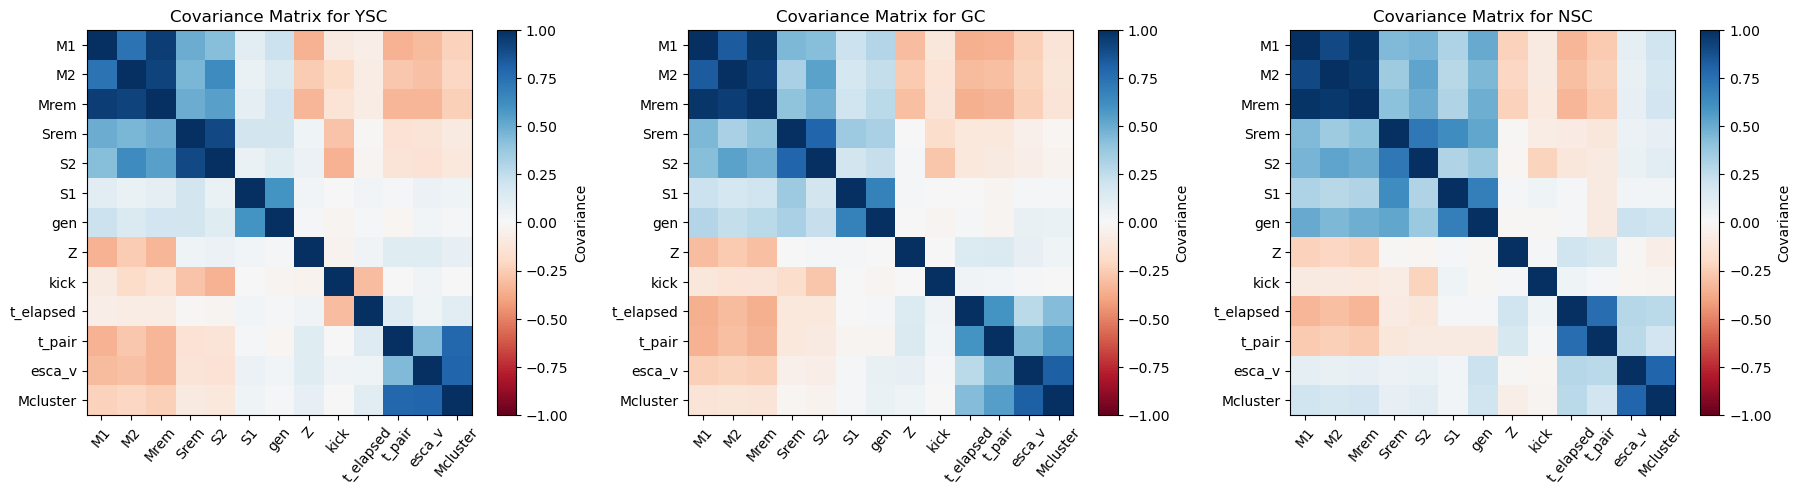

In [6]:
fig, ax = plt.subplots(1,3,figsize=(22,5))
plt.sca(ax[0])
funky.fast_covariance_matrix('ysc','RdBu')
plt.sca(ax[1])
funky.fast_covariance_matrix('gc', 'RdBu')
plt.sca(ax[2])
funky.fast_covariance_matrix('nsc', 'RdBu')
plt.show()

Here are plotted the covariance matrix for each type of host cluster in order to have a first glance on relationships between variables and how these change in different astrophysics environments.
In particular we see that the masses $M_1$ and $M_2$ are highly correlated to $M_rem$, and also the generation is correlated to the remnant mass especially in clusters that host BH of higher generations. 
According to the theory we see that the metallicity $Z$ is inversely correlated to the masses, since the metallicity increases the mass loss due to stellar winds during phases preceding the death of the star.
The time necessary for an object to pair and also the time elapsed since the start of simulations, respectively $t_{pair}$ and $t_{elapsed}$ are negatively correlated to the masses since higher time to pair usually means that the object are not massive enough to do so, $t_{elapsed}$ for the same reason, it becomes more evident for ancient clusters such as GCs and NSCs.

The following analysis focus on understanding more in detail other relationships between variables.